In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
start = '2017-01-01'
end = '2022-12-31'

In [4]:
data = yf.download('CL=F PTTEP.BK , GPSC.BK PTTGC.BK PTT.BK', start = start ,end=end,period=1)

[*********************100%***********************]  5 of 5 completed


In [5]:
df = data['Adj Close']

In [6]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-03,52.330002,NaN,NaN,NaN,NaN
2017-01-04,53.259998,29.146656,29.128021,74.474815,48.913532
2017-01-05,53.759998,28.555840,29.664595,74.096779,49.104603
2017-01-06,53.990002,28.555840,29.817898,74.474815,48.913532
2017-01-09,51.959999,28.555840,29.357983,73.907745,48.340328
...,...,...,...,...,...
2022-12-26,NaN,71.500000,32.250000,174.000000,45.500000
2022-12-27,79.529999,72.000000,32.500000,175.000000,47.250000
2022-12-28,78.959999,72.500000,32.750000,175.000000,47.500000


In [8]:
df = df.fillna(method='ffill').pct_change().dropna()

In [9]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,0.018421,-0.005076,0.003906
2017-01-06,0.004278,0.000000,0.005168,0.005102,-0.003891
2017-01-09,-0.037600,0.000000,-0.015424,-0.007614,-0.011719
2017-01-10,-0.021940,0.006897,0.013055,-0.017903,0.003953
2017-01-11,0.028139,0.006849,-0.007732,0.005208,-0.003937
...,...,...,...,...,...
2022-12-26,0.000000,0.003509,0.023810,0.014577,0.016760
2022-12-27,-0.000377,0.006993,0.007752,0.005747,0.038462
2022-12-28,-0.007167,0.006944,0.007692,0.000000,0.005291


In [10]:
df[(df.iloc[:,1:] == 0).all(1)]

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-13,-0.012073,0.0,0.0,0.0,0.0
2017-02-13,-0.017267,0.0,0.0,0.0,0.0
2017-04-06,0.010753,0.0,0.0,0.0,0.0
2017-04-13,0.001318,0.0,0.0,0.0,0.0
2017-05-01,-0.009933,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2022-10-13,0.021084,0.0,0.0,0.0,0.0
2022-10-14,-0.039277,0.0,0.0,0.0,0.0
2022-10-24,-0.005526,0.0,0.0,0.0,0.0


In [11]:
df[(df['PTT.BK'] == 0)]

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-13,-0.012073,0.000000,0.0,0.000000,0.000000
2017-01-19,0.005677,-0.006944,0.0,-0.002646,0.003831
2017-01-30,-0.010156,-0.013699,0.0,0.043478,0.007353
2017-02-01,0.020261,-0.006993,0.0,0.007653,-0.018450
2017-02-02,-0.006310,0.000000,0.0,-0.012658,0.000000
...,...,...,...,...,...
2022-12-13,0.030340,0.000000,0.0,0.020408,-0.010870
2022-12-19,0.012115,-0.006849,0.0,-0.037681,-0.005348
2022-12-20,0.011970,-0.017241,0.0,0.003012,-0.016129


In [16]:
df = df[~(df.iloc[:,1:] == 0).all(1)]

In [17]:
(df == 0).sum()

CL=F         52
GPSC.BK     182
PTT.BK      269
PTTEP.BK    158
PTTGC.BK    169
dtype: int64

In [19]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,0.018421,-0.005076,0.003906
2017-01-06,0.004278,0.000000,0.005168,0.005102,-0.003891
2017-01-09,-0.037600,0.000000,-0.015424,-0.007614,-0.011719
2017-01-10,-0.021940,0.006897,0.013055,-0.017903,0.003953
2017-01-11,0.028139,0.006849,-0.007732,0.005208,-0.003937
...,...,...,...,...,...
2022-12-26,0.000000,0.003509,0.023810,0.014577,0.016760
2022-12-27,-0.000377,0.006993,0.007752,0.005747,0.038462
2022-12-28,-0.007167,0.006944,0.007692,0.000000,0.005291


In [18]:
df[(df.iloc[:,1:] == 0).all(1)]

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,


In [20]:
df = df[['CL=F', 'PTTEP.BK' , 'GPSC.BK', 'PTTGC.BK', 'PTT.BK']]

In [21]:
df

,CL=F,PTTEP.BK,GPSC.BK,PTTGC.BK,PTT.BK
Date,,,,,
2017-01-05,0.009388,-0.005076,-0.020270,0.003906,0.018421
2017-01-06,0.004278,0.005102,0.000000,-0.003891,0.005168
2017-01-09,-0.037600,-0.007614,0.000000,-0.011719,-0.015424
2017-01-10,-0.021940,-0.017903,0.006897,0.003953,0.013055
2017-01-11,0.028139,0.005208,0.006849,-0.003937,-0.007732
...,...,...,...,...,...
2022-12-26,0.000000,0.014577,0.003509,0.016760,0.023810
2022-12-27,-0.000377,0.005747,0.006993,0.038462,0.007752
2022-12-28,-0.007167,0.000000,0.006944,0.005291,0.007692


<AxesSubplot:xlabel='Date'>

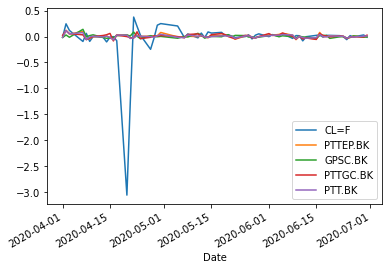

In [23]:
df.loc['2020-04': '2020-06'].plot()

In [24]:
start_remove = pd.to_datetime('2020-04-10')
end_remove = pd.to_datetime('2020-05-10')

df = df.loc[(df.index < start_remove)|(df.index > end_remove)]

In [25]:
df

,CL=F,PTTEP.BK,GPSC.BK,PTTGC.BK,PTT.BK
Date,,,,,
2017-01-05,0.009388,-0.005076,-0.020270,0.003906,0.018421
2017-01-06,0.004278,0.005102,0.000000,-0.003891,0.005168
2017-01-09,-0.037600,-0.007614,0.000000,-0.011719,-0.015424
2017-01-10,-0.021940,-0.017903,0.006897,0.003953,0.013055
2017-01-11,0.028139,0.005208,0.006849,-0.003937,-0.007732
...,...,...,...,...,...
2022-12-26,0.000000,0.014577,0.003509,0.016760,0.023810
2022-12-27,-0.000377,0.005747,0.006993,0.038462,0.007752
2022-12-28,-0.007167,0.000000,0.006944,0.005291,0.007692


<AxesSubplot:xlabel='Date'>

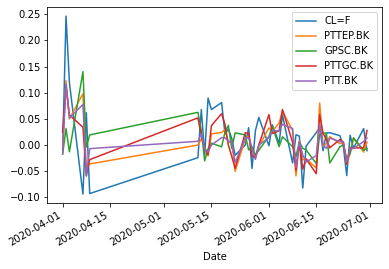

In [26]:
df.loc['2020-04': '2020-06'].plot()

In [28]:
X = df.iloc[:1000,:-1]
y = df.iloc[:1000,-1]

In [29]:
X

,CL=F,PTTEP.BK,GPSC.BK,PTTGC.BK
Date,,,,
2017-01-05,0.009388,-0.005076,-0.020270,0.003906
2017-01-06,0.004278,0.005102,0.000000,-0.003891
2017-01-09,-0.037600,-0.007614,0.000000,-0.011719
2017-01-10,-0.021940,-0.017903,0.006897,0.003953
2017-01-11,0.028139,0.005208,0.006849,-0.003937
...,...,...,...,...
2021-03-03,0.025607,0.008889,0.026756,0.027888
2021-03-04,0.041612,0.000000,-0.016287,-0.019380
2021-03-05,0.035406,0.022026,0.000000,0.035573


In [30]:
Lower_limit = df.quantile(0.01)
Upper_limit = df.quantile(0.99)

In [32]:
df = df[~((df < Lower_limit) | (df > Upper_limit)).any(1)]

In [33]:
df.describe()

,CL=F,PTTEP.BK,GPSC.BK,PTTGC.BK,PTT.BK
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,0.000490,0.001044,0.000517,0.000236,0.000158
std,0.020468,0.015130,0.017951,0.015508,0.012533
min,-0.075685,-0.047273,-0.054598,-0.047619,-0.038674
25%,-0.010187,-0.008316,-0.009390,-0.009471,-0.006711
50%,0.001520,0.000000,0.000000,0.000000,0.000000
75%,0.012677,0.008850,0.009820,0.009615,0.006667
max,0.067852,0.053073,0.060898,0.051643,0.050633


In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [35]:
lm = LinearRegression()
score = cross_val_score(lm,X,y,scoring='r2',cv=10)
score

array([0.29792579, 0.47547441, 0.23540178, 0.55351441, 0.65935223,
       0.36486245, 0.62614854, 0.87162492, 0.62354099, 0.61576625])

In [36]:
df.corr()

,CL=F,PTTEP.BK,GPSC.BK,PTTGC.BK,PTT.BK
CL=F,1.000000,0.175535,0.018246,0.110727,0.148240
PTTEP.BK,0.175535,1.000000,0.114631,0.413928,0.591141
GPSC.BK,0.018246,0.114631,1.000000,0.218894,0.203651
PTTGC.BK,0.110727,0.413928,0.218894,1.000000,0.533069
PTT.BK,0.148240,0.591141,0.203651,0.533069,1.000000


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
scores = cross_val_score(lm,X_train,y_train,scoring='r2',cv=10)
scores

array([0.37889503, 0.62170194, 0.64967471, 0.71570799, 0.53722   ,
       0.71980695, 0.4781533 , 0.86970688, 0.758454  , 0.50679633])

In [39]:
model = LinearRegression()
reg = model.fit(X_train,y_train)

In [41]:
y_pred = reg.predict(X_test)

In [42]:
reg.score(X_test,y_test)

0.5629308846397141

In [52]:
print("MAE = " , metrics.mean_absolute_error(y_test,y_pred))
print("MSE = " ,  metrics.mean_squared_error(y_test,y_pred))
print("RMSE = " , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE =  0.00885425552135547
MSE =  0.00014502689171605476
RMSE =  0.012042711144757013


In [53]:
reg.coef_

array([0.01563533, 0.47237161, 0.03658372, 0.27246276])

In [54]:
live_data = reg.predict(df.iloc[1000:,:-1])

In [55]:
live_data

array([ 4.74822354e-03, -7.23608296e-03, -4.36551496e-03,  5.04329132e-03,
       -2.45742882e-02,  1.73233367e-02,  2.26156941e-03,  2.13062743e-03,
       -1.22076400e-02, -5.80824344e-04,  6.18158943e-03,  1.37131888e-02,
       -5.61206170e-03,  7.36959733e-04,  8.95222935e-03, -3.49225193e-03,
       -5.08686616e-04, -1.63314665e-02, -1.74407293e-02,  2.67006477e-02,
        2.56447085e-02,  5.41013793e-03, -1.54741737e-04,  6.87684377e-03,
        2.93246274e-02, -6.05744991e-03, -1.41549466e-02,  5.79215614e-03,
        1.33762072e-05, -1.33578825e-02, -6.61969536e-03, -5.13143585e-03,
        6.77134578e-04,  1.18092884e-03,  9.03603042e-03,  2.06442591e-02,
       -2.82290341e-03,  4.53648436e-03, -1.42800691e-03, -1.49218529e-02,
        8.20014171e-03,  2.72597341e-03,  4.55028713e-03,  2.21408534e-02,
        1.64586535e-02, -2.28379658e-03, -6.32361426e-03,  1.32388511e-03,
        1.07344535e-02,  6.77390791e-03,  4.82133572e-03, -4.50667431e-03,
        5.13041765e-03,  

In [56]:
test = df.iloc[1000:]

In [57]:
test

,CL=F,PTTEP.BK,GPSC.BK,PTTGC.BK,PTT.BK
Date,,,,,
2021-07-22,0.022902,0.004630,-0.003135,0.008696,0.006945
2021-07-23,0.002225,-0.004608,-0.009434,-0.017241,-0.013793
2021-07-27,-0.003616,-0.009259,0.003175,0.000000,-0.006993
2021-07-29,0.016991,0.004673,0.006329,0.008772,0.000000
2021-07-30,0.004482,-0.041861,-0.034591,-0.013044,-0.021127
...,...,...,...,...,...
2022-12-26,0.000000,0.014577,0.003509,0.016760,0.023810
2022-12-27,-0.000377,0.005747,0.006993,0.038462,0.007752
2022-12-28,-0.007167,0.000000,0.006944,0.005291,0.007692


In [58]:
test['Pred'] = live_data

C:\Users\Yanak\AppData\Local\Temp/ipykernel_1812/2832366921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = live_data


In [59]:
test

,CL=F,PTTEP.BK,GPSC.BK,PTTGC.BK,PTT.BK,Pred
Date,,,,,,
2021-07-22,0.022902,0.004630,-0.003135,0.008696,0.006945,0.004748
2021-07-23,0.002225,-0.004608,-0.009434,-0.017241,-0.013793,-0.007236
2021-07-27,-0.003616,-0.009259,0.003175,0.000000,-0.006993,-0.004366
2021-07-29,0.016991,0.004673,0.006329,0.008772,0.000000,0.005043
2021-07-30,0.004482,-0.041861,-0.034591,-0.013044,-0.021127,-0.024574
...,...,...,...,...,...,...
2022-12-26,0.000000,0.014577,0.003509,0.016760,0.023810,0.011529
2022-12-27,-0.000377,0.005747,0.006993,0.038462,0.007752,0.013393
2022-12-28,-0.007167,0.000000,0.006944,0.005291,0.007692,0.001532


<AxesSubplot:xlabel='Date'>

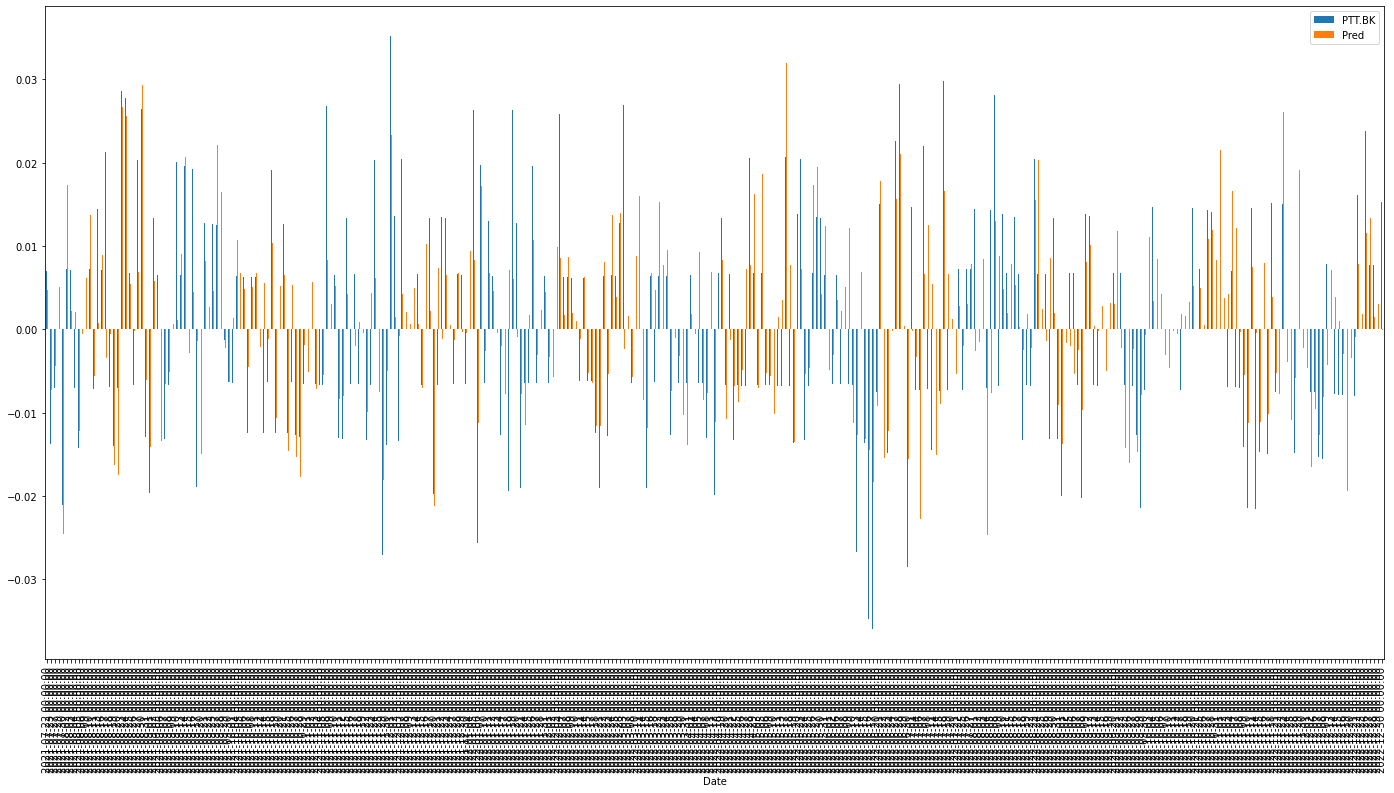

In [62]:
test.iloc[:,-2:].plot(kind='bar',figsize =(24,12))

In [63]:
(test+1)

,CL=F,PTTEP.BK,GPSC.BK,PTTGC.BK,PTT.BK,Pred
Date,,,,,,
2021-07-22,1.022902,1.004630,0.996865,1.008696,1.006945,1.004748
2021-07-23,1.002225,0.995392,0.990566,0.982759,0.986207,0.992764
2021-07-27,0.996384,0.990741,1.003175,1.000000,0.993007,0.995634
2021-07-29,1.016991,1.004673,1.006329,1.008772,1.000000,1.005043
2021-07-30,1.004482,0.958139,0.965409,0.986956,0.978873,0.975426
...,...,...,...,...,...,...
2022-12-26,1.000000,1.014577,1.003509,1.016760,1.023810,1.011529
2022-12-27,0.999623,1.005747,1.006993,1.038462,1.007752,1.013393
2022-12-28,0.992833,1.000000,1.006944,1.005291,1.007692,1.001532


In [64]:
(test+1).cumprod()

,CL=F,PTTEP.BK,GPSC.BK,PTTGC.BK,PTT.BK,Pred
Date,,,,,,
2021-07-22,1.022902,1.004630,0.996865,1.008696,1.006945,1.004748
2021-07-23,1.025178,1.000000,0.987461,0.991304,0.993056,0.997478
2021-07-27,1.021471,0.990741,0.990596,0.991304,0.986111,0.993123
2021-07-29,1.038827,0.995370,0.996865,1.000000,0.986111,0.998132
2021-07-30,1.043484,0.953704,0.962383,0.986956,0.965278,0.973604
...,...,...,...,...,...,...
2022-12-26,1.027592,1.709342,0.981845,1.007458,1.023503,1.289655
2022-12-27,1.027205,1.719166,0.988711,1.046207,1.031437,1.306927
2022-12-28,1.019843,1.719166,0.995577,1.051742,1.039372,1.308930


<AxesSubplot:xlabel='Date'>

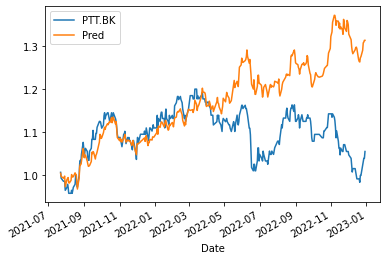

In [65]:
(test+1).iloc[:,-2:].cumprod().plot()